# Analysis of Ability Distribution in SMITE2 RPG Game Weapons: A Focus on Group, Positive, and Negative Effects

# DATASET

## DESCRIPTION

This dataset contains detailed information on items featured in the alpha version of Smite 2 during its first weekend. Each row represents a unique item and includes the following columns:

* Name: The name of the item.
* Price: The cost of purchasing the item.
* Tier: The tier or level of the item.
* Strength: Strength attribute of the item.
* Attack_Speed_Percentage: Percentage increase in attack speed provided by the item.
* Max_Mana: Maximum mana attribute of the item.
* Intelligence: Intelligence attribute of the item.
* Max_Health: Maximum health attribute of the item.
* Cooldown_Rate_Percentage: Percentage decrease in cooldown time provided by the item.
* Magical_Protection: Magical protection attribute of the item.
* Critical_Chance_Percentage: Percentage increase in critical hit chance provided by the item.
* Lifesteal_Percentage: Percentage of lifesteal provided by the item.
* Physical_Protection: Physical protection attribute of the item.
* Magical_Penetration_Percentage: Percentage of magical penetration provided by the item.
* Physical_Penetration_Percentage: Percentage of physical penetration provided by the item.
* Mana_Regen: Mana regeneration attribute of the item.
* Movement_Speed_Percentage: Percentage increase in movement speed provided by the item.
* Health_Regen: Health regeneration attribute of the item.
* Passive: Description of the passive ability or effect of the item.
* Active: Description of the active ability or effect of the item, if applicable.

In [ ]:
import pandas as pd

df = pd.read_csv('smite2_items.csv')

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             91 non-null     object 
 1   Price                            91 non-null     int64  
 2   Tier                             91 non-null     int64  
 3   Strength                         91 non-null     float64
 4   Attack_Speed_Percentage          91 non-null     float64
 5   Max_Mana                         91 non-null     float64
 6   Intelligence                     91 non-null     float64
 7   Max_Health                       91 non-null     float64
 8   Cooldown_Rate_Percentage         91 non-null     float64
 9   Magical_Protection               91 non-null     float64
 10  Critical_Chance_Percentage       91 non-null     float64
 11  Lifesteal_Percentage             91 non-null     float64
 12  Physical_Protection     

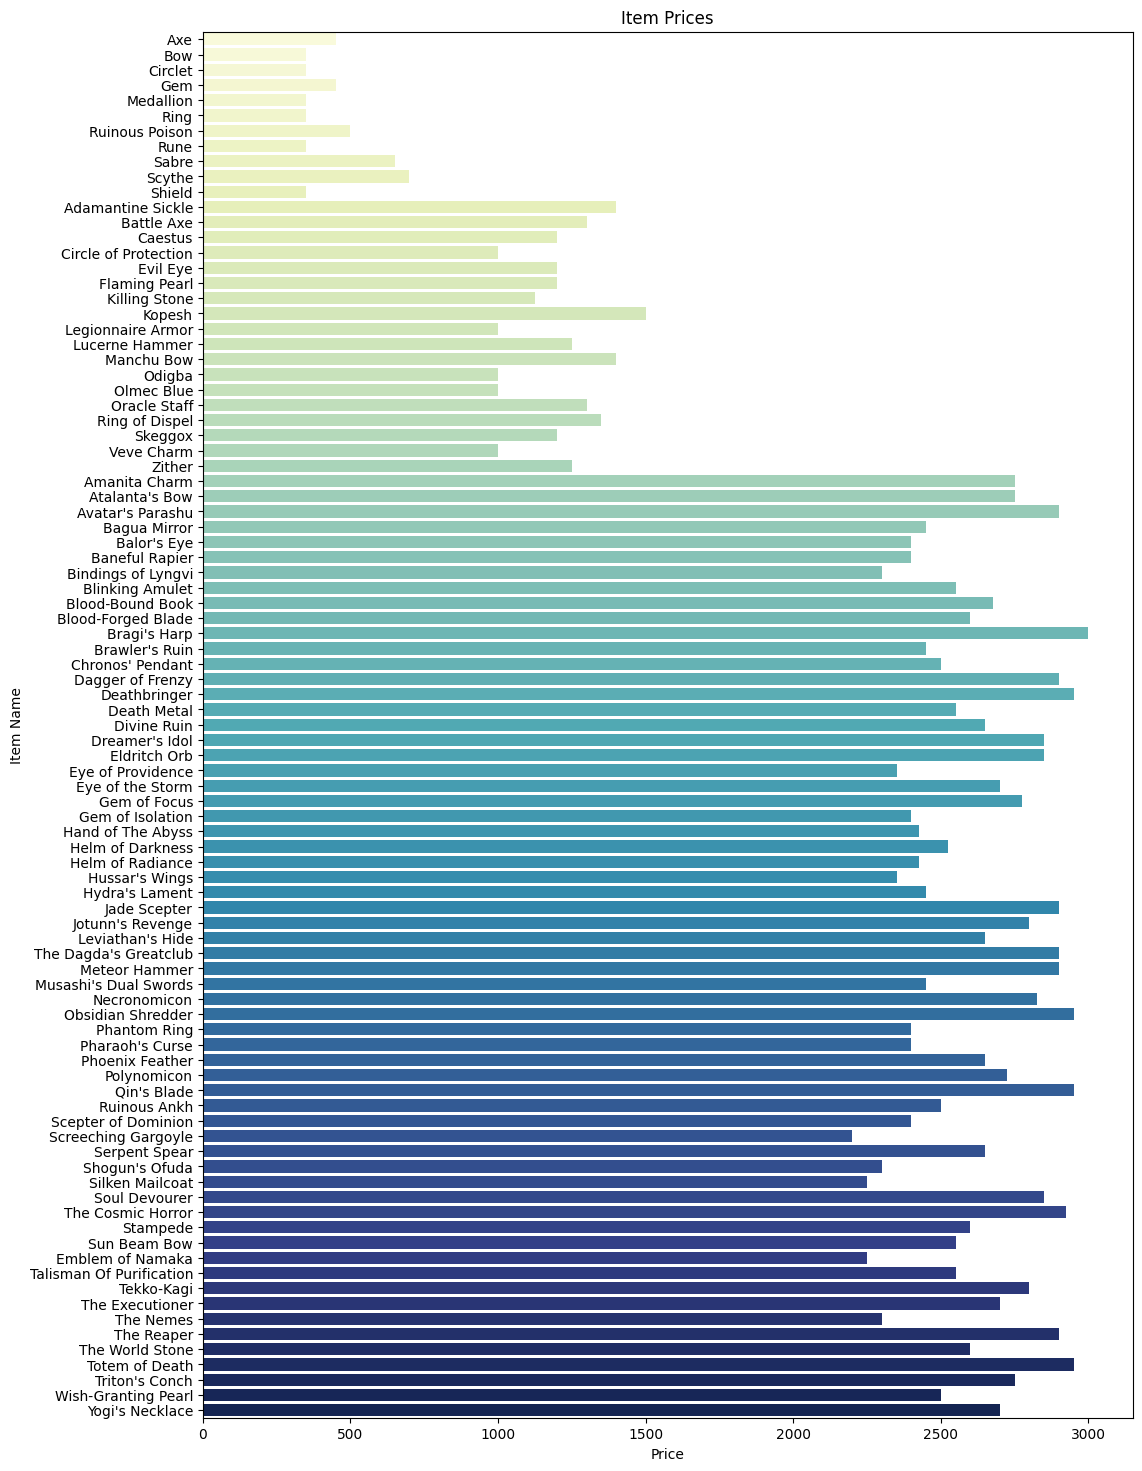

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 18))
sns.barplot(x='Price', y='Name', data=df, palette='YlGnBu')
plt.title('Item Prices')
plt.xlabel('Price')
plt.ylabel('Item Name')
plt.show()

### DATASET PROFILING

#### PACKAGE

In [ ]:
!pip install ydata-profiling

#### PROFILE

In [ ]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(df[df['Passive'].str.contains(r'\D', na=False)])

44

In [ ]:
len(df[df['Active'].str.contains(r'\D', na=False)])

21

# OBJECTIVE

1. Utilize Natural Language Processing (NLP) techniques to extract meaningful information from the weapon description columns, specifically "Passive" and "Active", in the SMITE2 RPG game dataset.

2. Apply data mining methods to identify the optimal combination of abilities from the weapon descriptions, aiming to construct a comprehensive wordnet representing the weapons' attributes and capabilities.

3. Conduct a secondary filtering process to categorize the abilities extracted from the weapon descriptions into positive, negative, and group-oriented (self or self+allies) abilities, facilitating a deeper understanding of their impact on gameplay dynamics.

4. Aggregate and analyze the categorized abilities to determine their prevalence and distribution within the dataset, enabling insights into the prevalence of various types of abilities across different weapons in the game.

# DATA MINING

## COMBINATION IDENTIFICATION

You can change the keywords to the modify and get new combination

In [ ]:
from itertools import product

# Define gain and loss keywords
keys = ['gain', 'lose', 'you', 'enemy', 'allie','reduce','bonus','restore']

keywords = {word: [''.join(comb) for comb in product(*zip(word.upper(), word.lower()))] for word in keys}

print(keywords)

{'gain': ['GAIN', 'GAIn', 'GAiN', 'GAin', 'GaIN', 'GaIn', 'GaiN', 'Gain', 'gAIN', 'gAIn', 'gAiN', 'gAin', 'gaIN', 'gaIn', 'gaiN', 'gain'], 'lose': ['LOSE', 'LOSe', 'LOsE', 'LOse', 'LoSE', 'LoSe', 'LosE', 'Lose', 'lOSE', 'lOSe', 'lOsE', 'lOse', 'loSE', 'loSe', 'losE', 'lose'], 'you': ['YOU', 'YOu', 'YoU', 'You', 'yOU', 'yOu', 'yoU', 'you'], 'enemy': ['ENEMY', 'ENEMy', 'ENEmY', 'ENEmy', 'ENeMY', 'ENeMy', 'ENemY', 'ENemy', 'EnEMY', 'EnEMy', 'EnEmY', 'EnEmy', 'EneMY', 'EneMy', 'EnemY', 'Enemy', 'eNEMY', 'eNEMy', 'eNEmY', 'eNEmy', 'eNeMY', 'eNeMy', 'eNemY', 'eNemy', 'enEMY', 'enEMy', 'enEmY', 'enEmy', 'eneMY', 'eneMy', 'enemY', 'enemy'], 'allie': ['ALLIE', 'ALLIe', 'ALLiE', 'ALLie', 'ALlIE', 'ALlIe', 'ALliE', 'ALlie', 'AlLIE', 'AlLIe', 'AlLiE', 'AlLie', 'AllIE', 'AllIe', 'AlliE', 'Allie', 'aLLIE', 'aLLIe', 'aLLiE', 'aLLie', 'aLlIE', 'aLlIe', 'aLliE', 'aLlie', 'alLIE', 'alLIe', 'alLiE', 'alLie', 'allIE', 'allIe', 'alliE', 'allie'], 'reduce': ['REDUCE', 'REDUCe', 'REDUcE', 'REDUce', 'REDuCE',

In [ ]:
from itertools import combinations

# Generate combinations for each length from 1 to len(keys)
combo_passive = {}
combo_active = {}
for r in range(1, len(keys) + 1):
    keyword_combinations = list(combinations(keys, r))
    for combo in keyword_combinations:
        # Apply lambda function for each combination
        passive_function = df['Passive'].apply(lambda x: all(any(keyword in x for keyword in keywords[word]) for word in combo))
        active_function = df['Active'].apply(lambda x: all(any(keyword in x for keyword in keywords[word]) for word in combo))
        combo_passive[combo] = passive_function
        combo_active[combo] = active_function
print(combo_passive.keys())

dict_keys([('gain',), ('lose',), ('you',), ('enemy',), ('allie',), ('reduce',), ('bonus',), ('restore',), ('gain', 'lose'), ('gain', 'you'), ('gain', 'enemy'), ('gain', 'allie'), ('gain', 'reduce'), ('gain', 'bonus'), ('gain', 'restore'), ('lose', 'you'), ('lose', 'enemy'), ('lose', 'allie'), ('lose', 'reduce'), ('lose', 'bonus'), ('lose', 'restore'), ('you', 'enemy'), ('you', 'allie'), ('you', 'reduce'), ('you', 'bonus'), ('you', 'restore'), ('enemy', 'allie'), ('enemy', 'reduce'), ('enemy', 'bonus'), ('enemy', 'restore'), ('allie', 'reduce'), ('allie', 'bonus'), ('allie', 'restore'), ('reduce', 'bonus'), ('reduce', 'restore'), ('bonus', 'restore'), ('gain', 'lose', 'you'), ('gain', 'lose', 'enemy'), ('gain', 'lose', 'allie'), ('gain', 'lose', 'reduce'), ('gain', 'lose', 'bonus'), ('gain', 'lose', 'restore'), ('gain', 'you', 'enemy'), ('gain', 'you', 'allie'), ('gain', 'you', 'reduce'), ('gain', 'you', 'bonus'), ('gain', 'you', 'restore'), ('gain', 'enemy', 'allie'), ('gain', 'enemy',

### Passive

In [ ]:
lengths_passive = {}
for combo, function in combo_passive.items():
    lengths_passive[combo] = len(df[function])

lengths_passive_df = pd.DataFrame(list(lengths_passive.items()), columns=['Combination', 'Length'])

In [ ]:
word_net = lengths_passive_df[lengths_passive_df['Length'] != 0]
word_net = word_net.sort_values(by='Length',ascending=False).reset_index(drop=True)
print(word_net)

                   Combination  Length
0                       (you,)      42
1                      (gain,)      23
2                  (gain, you)      23
3                     (enemy,)      21
4                 (you, enemy)      21
5           (gain, you, enemy)       9
6                (gain, enemy)       9
7                    (reduce,)       8
8                 (you, bonus)       7
9                (you, reduce)       7
10                    (bonus,)       7
11                     (lose,)       6
12        (you, enemy, reduce)       5
13             (enemy, reduce)       5
14                 (lose, you)       5
15          (lose, you, enemy)       4
16               (lose, enemy)       4
17                  (restore,)       2
18                (you, allie)       2
19              (you, restore)       2
20       (you, enemy, restore)       2
21              (enemy, bonus)       2
22               (gain, allie)       2
23         (you, enemy, bonus)       2
24                    (al

In [ ]:
# print(df[combo_passive[('gain','lose','you','enemy')]])

### Active

In [ ]:
lengths_active = {}
for combo, function in combo_active.items():
    lengths_active[combo] = len(df[function])

lengths_active_df = pd.DataFrame(list(lengths_active.items()), columns=['Combination', 'Length'])

In [ ]:
word_net = lengths_active_df[lengths_active_df['Length'] != 0]
word_net = word_net.sort_values(by='Length',ascending=False).reset_index(drop=True)
print(word_net)

           Combination  Length
0               (you,)      16
1              (gain,)      10
2          (gain, you)      10
3             (allie,)       7
4         (you, allie)       6
5        (gain, allie)       5
6   (gain, you, allie)       5
7             (enemy,)       4
8         (you, enemy)       2
9              (lose,)       1
10           (reduce,)       1
11       (lose, enemy)       1


In [ ]:
# print(df[combo_active[('gain','lose','you','enemy')]])

## CLUBBLING

### Passive

In [ ]:
group = df['Passive'].apply(lambda x: any(keyword in x for keyword in keywords['you'] + keywords['allie']))
positive = df['Passive'].apply(lambda x: any(keyword in x for keyword in keywords['gain'] + keywords['restore'] + keywords['bonus']))
negative = df['Passive'].apply(lambda x: any(keyword in x for keyword in keywords['lose'] + keywords['reduce'] + keywords['enemy']))

In [ ]:
print(len(df[group]))
print(len(df[positive]))
print(len(df[negative]))

42
31
26


### Active

In [ ]:
group = df['Active'].apply(lambda x: any(keyword in x for keyword in keywords['you'] + keywords['allie']))
positive = df['Active'].apply(lambda x: any(keyword in x for keyword in keywords['gain'] + keywords['restore'] + keywords['bonus']))
negative = df['Active'].apply(lambda x: any(keyword in x for keyword in keywords['lose'] + keywords['reduce'] + keywords['enemy']))

In [ ]:
print(len(df[group]))
print(len(df[positive]))
print(len(df[negative]))

17
10
5


# CONCLUSION

Based on our analysis of the SMITE2 RPG game weapon dataset, we found that the majority of abilities provided by weapons are geared towards group effects, benefiting both the player and their team. Positive abilities, which offer buffs to the player, rank second in prevalence, while negative abilities, inflicting debuffs upon striking enemies or enemy gods, are the least common. This insight underscores the importance of team dynamics and cooperative play in maximizing the effectiveness of weapons in the game.